In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, destroy, variance, coherent
from scipy.optimize import minimize

In [3]:
#Auxiliary function used to minizi the nonlinear variance
def nlsqpa_v0(l,par):
    l = l[0]
    stav = par[0]
    dim = par[1]
    A = destroy(dim)
    x = (A.dag()+A)/np.sqrt(2)
    p = 1j*(A.dag()-A)/np.sqrt(2)
    return variance(l*p - x**2 / np.sqrt(2)/l**2,stav)/(3/4)

#Function that outputs the value of cubic nonlinear squeezing
def nlsq_v0(stav,dim):
    return minimize(nlsqpa_v0,1.13,args=[stav,dim]).fun

def simulate_spacs(ampl,N):
    a = destroy(N)
    psi = a.dag()*coherent(N, ampl) # Coherent photon addition
    psi = psi.unit() # State vector normalization
    rho = psi * psi.dag() # Making a density matrix out ouf the state psi
    rho = rho[:] # Returning density matrix as an numpy array not Qobj
    return rho

def simulate_tpacs(ampl,N):
    a = destroy(N)
    psi = a.dag()*a.dag()*coherent(N, ampl) # Coherent photon addition
    psi = psi.unit() # State vector normalization
    rho = psi * psi.dag() # Making a density matrix out ouf the state psi
    rho = rho[:] # Returning density matrix as an numpy array not Qobj
    return rho

In [2]:
amplitudes_tpacs = np.array([1.2094494296716143, 1.0481857558557053])
cubic_nlsqs_tpacs = [0.7683992888963331, 0.8333026952140088]
cubic_nlsqs_err_tpacs = np.array([0.116,0.166])

amplitudes_spacs = np.array([0.60382857820543, 0.7829442161976218, 0.9819268739639597, 1.2410978792122727, 1.431436731069673, 1.350031630110495])
cubic_nlsqs_spacs = [1.557,1.062,0.864,0.812,0.735,0.762]
cubic_nlsqs_err_spacs = [0.12,0.096,0.078,0.077,0.051,0.072]

c1=(230/255,52/255,81/255,1)
c2=(37/255,87/255,243/255,1)
c3=(108/255,35/255,244/255,1)

In [4]:
dim = 25
List_of_alphas = np.arange(0.45,2,0.01)

List_of_states_tpacs = [nlsq_v0(Qobj(simulate_tpacs(-alpha*1j,N=dim)),dim) for alpha in List_of_alphas]
List_of_states_tpacs = np.array(List_of_states_tpacs)

List_of_states_spacs = [nlsq_v0(Qobj(simulate_spacs(-alpha*1j,N=dim)),dim) for alpha in List_of_alphas]
List_of_states_spacs = np.array(List_of_states_spacs)

<IPython.core.display.Javascript object>


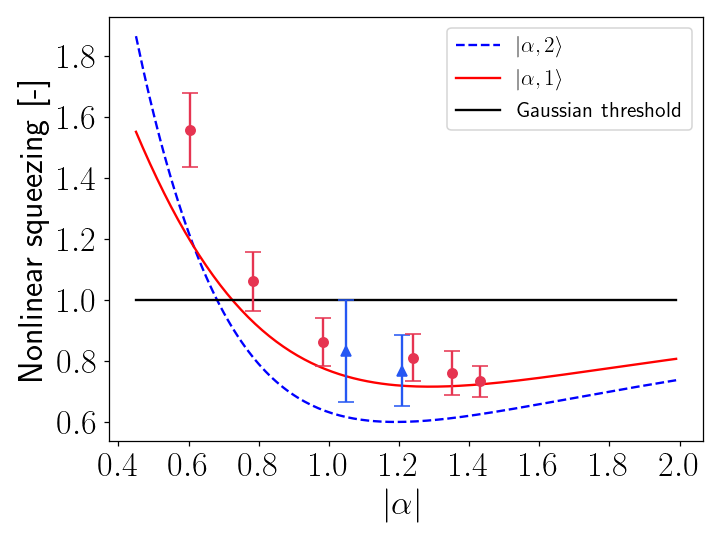

In [8]:
fontsize = 22
labelfontsize = 14
plt.rcParams['text.usetex'] = True

%matplotlib notebook
plt.plot(List_of_alphas,List_of_states_tpacs,'b--',label = r"$|\alpha,2\rangle$")
plt.plot(List_of_alphas,List_of_states_spacs,'r-',label = r"$|\alpha,1\rangle$")
plt.plot(List_of_alphas,np.ones(len(List_of_alphas)),"k-",label = "Gaussian threshold")
#plt.plot(amplitudes_tpacs,measured_nlsqs_tpacs,'r.',label = "Measured TPACs")
plt.errorbar(amplitudes_tpacs,cubic_nlsqs_tpacs, yerr = cubic_nlsqs_err_tpacs,fmt ='^',color=c2, capsize=5)
#plt.plot(amplitudes,measured_nlsqs,'b.',label = "Measured SPACs")
plt.errorbar(amplitudes_spacs,cubic_nlsqs_spacs, yerr = cubic_nlsqs_err_spacs,fmt ='o',color=c1, capsize=5)
plt.xlabel(r'$\vert \alpha \vert$',fontsize = fontsize)
plt.ylabel('Nonlinear squeezing [-]',fontsize = fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize = labelfontsize)
plt.tight_layout()
plt.savefig("Figure 4.png",dpi=300)